# **Spit some [tensor] flow**

We need to learn the intricacies of tensorflow to master deep learning

`Let's get this over with`

## We'll take over the MNIST dataset and use a basic ANN to classify the digits

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.2.0


## Let's load the dataset using keras datasets 

In [0]:
dataset = tf.keras.datasets.mnist

In [8]:
(X_train, y_train), (X_test, y_test) = dataset.load_data()
X_train, X_test = X_train/255.0 , X_test/255.0

11493376/11490434 [==============================] - 0s 0us/step


In [9]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [0]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape = (X_train.shape[1], X_train.shape[2])),
                                    tf.keras.layers.Dense(64, activation='relu'),
                                    tf.keras.layers.Dropout(0.1),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [0]:
report = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 30)

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3338 - accuracy: 0.9045 - val_loss: 0.1713 - val_accuracy: 0.9493
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1705 - accuracy: 0.9500 - val_loss: 0.1257 - val_accuracy: 0.9619
Epoch 3/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1295 - accuracy: 0.9622 - val_loss: 0.1070 - val_accuracy: 0.9680
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1092 - accuracy: 0.9667 - val_loss: 0.1009 - val_accuracy: 0.9706
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0942 - accuracy: 0.9710 - val_loss: 0.0935 - val_accuracy: 0.9703
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0829 - accuracy: 0.9745 - val_loss: 0.0900 - val_accuracy: 0.9719
Epoch 7/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0761 - accuracy: 0.9761 - val_loss: 0.0894 - val_accuracy:

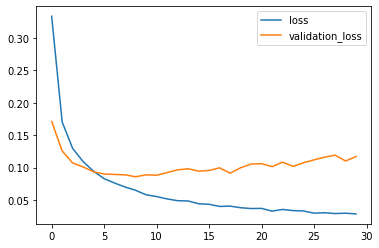

In [0]:
plt.plot(report.history['loss'], label="loss")
plt.plot(report.history['val_loss'], label="validation_loss")
plt.legend()

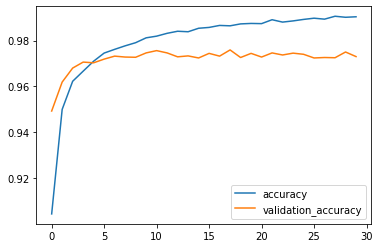

In [0]:
plt.plot(report.history['accuracy'], label="accuracy")
plt.plot(report.history['val_accuracy'], label="validation_accuracy")
plt.legend()

In [0]:
print("Train eval: ", model.evaluate(X_train, y_train))
print("Test eval: ", model.evaluate(X_test, y_test))


1875/1875 [==============================] - 2s 1ms/step - loss: 0.0116 - accuracy: 0.9967
Train eval:  [0.011624787002801895, 0.9966833591461182]
313/313 [==============================] - 0s 1ms/step - loss: 0.1171 - accuracy: 0.9730
Test eval:  [0.11707121878862381, 0.9729999899864197]


In [0]:
y_pred = model.predict(X_test).argmax(axis=1)

In [0]:
print(y_test.shape)
print(y_pred.shape)

(10000,)
(10000,)


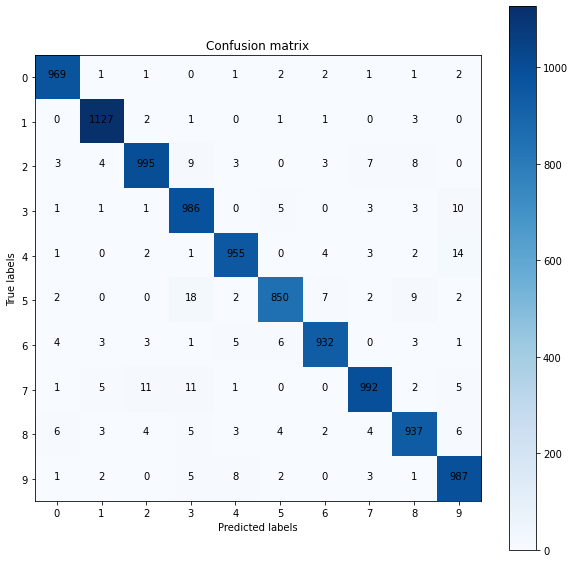

In [0]:
from sklearn.metrics import confusion_matrix
import itertools
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,10))
plt.imshow(cm, cmap=plt.cm.Blues)
for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, format(cm[i,j], 'd'),
           horizontalalignment = 'center',
           color='black')
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks(list(range(10)))
plt.yticks(list(range(10)))
plt.title('Confusion matrix')
plt.colorbar()
plt.show()


Text(0.5, 1.0, 'Predicted = 4, Real = 2')

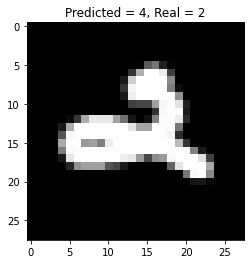

In [0]:
misshits = np.where(y_pred!=y_test)[0]
index = np.random.choice(misshits)
plt.imshow(X_test[index], cmap='gray')
plt.title("Predicted = " + str(y_pred[index]) + ", Real = " + str(y_test[index]))

In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint 

In [0]:
checkpointer = ModelCheckpoint(filepath='mnist.best.hdf5', save_best_only = True)

In [0]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape = (X_train.shape[1], X_train.shape[2])),
                                    tf.keras.layers.Dense(64, activation='relu'),
                                    tf.keras.layers.Dropout(0.1),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

In [0]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [34]:
report = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 30, callbacks = [checkpointer])

Epoch 1/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3416 - accuracy: 0.9027 - val_loss: 0.1802 - val_accuracy: 0.9447
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1755 - accuracy: 0.9479 - val_loss: 0.1226 - val_accuracy: 0.9632
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1321 - accuracy: 0.9595 - val_loss: 0.1026 - val_accuracy: 0.9696
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1090 - accuracy: 0.9662 - val_loss: 0.0940 - val_accuracy: 0.9723
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0948 - accuracy: 0.9702 - val_loss: 0.0934 - val_accuracy: 0.9726
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0855 - accuracy: 0.9728 - val_loss: 0.0850 - val_accuracy: 0.9747
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0769 - accuracy: 0.9753 - val_loss: 0.0802 - val_accuracy:

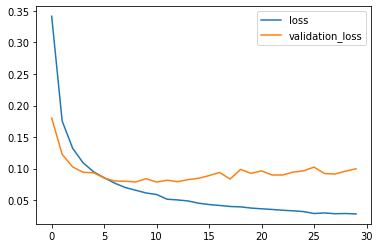

In [35]:
plt.plot(report.history['loss'], label="loss")
plt.plot(report.history['val_loss'], label="validation_loss")
plt.legend()

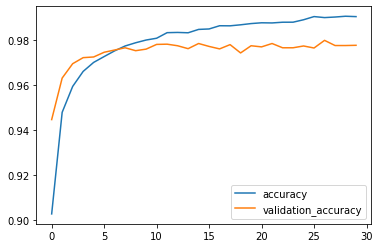

In [36]:
plt.plot(report.history['accuracy'], label="accuracy")
plt.plot(report.history['val_accuracy'], label="validation_accuracy")
plt.legend()

In [37]:
print("Train eval: ", model.evaluate(X_train, y_train))
print("Test eval: ", model.evaluate(X_test, y_test))


1875/1875 [==============================] - 3s 1ms/step - loss: 0.0094 - accuracy: 0.9971
Train eval:  [0.009392145089805126, 0.9971333146095276]
313/313 [==============================] - 0s 1ms/step - loss: 0.0997 - accuracy: 0.9778
Test eval:  [0.09967707097530365, 0.9778000116348267]


In [0]:
model_saved = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape = (X_train.shape[1], X_train.shape[2])),
                                    tf.keras.layers.Dense(64, activation='relu'),
                                    tf.keras.layers.Dropout(0.1),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

In [0]:
model_saved.load_weights('mnist.best.hdf5')

In [0]:
model_saved.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [41]:
print("Train eval: ", model_saved.evaluate(X_train, y_train))
print("Test eval: ", model_saved.evaluate(X_test, y_test))

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0277 - accuracy: 0.9918
Train eval:  [0.027722148224711418, 0.9917666912078857]
313/313 [==============================] - 0s 1ms/step - loss: 0.0786 - accuracy: 0.9782
Test eval:  [0.07857372611761093, 0.9782000184059143]
